<a href="https://colab.research.google.com/github/ipopStats/Nyhus_Popper_CMPS3160_Project/blob/main/Wingspans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evan Nyhus and Isaac Popper will be evaluating the effect of wingspan on success in the NBA. Our github can be found here: https://github.com/ipopStats/Nyhus_Popper_CMPS3160_Project

**Project Goals**



*   Learn how to use pandas library
*   Create a data visualization project in Python
*   Demonstrate why wingspan is an overlooked metric
*   Demonstrate the overall impact of wingspan on not only the defensive side of the ball but on offense as well.




**Collaboration Plan**

We plan to meet once a week in the library to make progress combining the datasets, creating visualizations, and analyzing the data. We will meet on either on Thursday or Sunday evenings. We set up a private CoLab notebook so we can store our code and work on the project simultaneously. We will communicate through text message about when we will meet, and to help each other between meetings.

**Data Description**

We are seeking to examine the correlation between a player's wingspan and NBA success, with wingspan being the independent variable.

Tal Boger, formerly of Dribble Analytics, created a comprehensive database of player wingspans for the 540 NBA players in 2017-2018. He took most player's anthrometric data from the NBA combine and gathered most of the rest from websites like DraftExpress. DraftExpress data points are highlighted in yellow, while data that is not from the draft data is highlighted in blue with the source specified. You can access it here: https://github.com/dribbleanalytics/wingspan-height-defense.

Our second data source is FiveThirtyEight's modern RAPTOR database. RAPTOR is a player proposition value that draws from both player tracking and on-off NBA data. You can learn more about the algorithim here: https://fivethirtyeight.com/features/introducing-raptor-our-new-metric-for-the-modern-nba/. We will need to filter the dataset to 2017-2018. This will allow us to evaluate the impact wingspan has on player success. To eliminate noise and smooth the data, we will use 3 year averages to evaluate wingspan's impact on performance. You can access the data here: https://github.com/fivethirtyeight/data/blob/master/nba-raptor/.


Our third data source is NBA.com's advanced stats. With the league collecting and providing these player tracking metrics, we can evaluate the importance of wingpan length in certain elements of the game. For example, we will see if wingspan is important in terms of defending 3-pointers. You can access this data here: https://www.nba.com/stats/players/defense-dash-3pt?Season=2018-19.

**Code:**

In [ ]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Table 1

In [ ]:
wingspan = pd.read_csv("/content/drive/MyDrive/cmps3160/project/2018_Wingspans.csv")
wingspan.head() #Read csv and display first 5 rows



,Num,Player,Wingspan-ft-in,Height-ft-in,Height-string-length,Height-ft-only,Height-in-only,Wingspan-string-length,Wingspan-ft-only,Wingspan-in-only,Wingspan-in,Height-in,Source (if not Combine Anthrometric/DX)
0,1,Alex Abrines,6' 6'',6' 5'',6,6,5.00,6,6,6.00,78.00,77.00,Bleacher Report
1,2,Quincy Acy,7' 2.75'',6' 6.5'',8,6,6.50,9,7,2.75,86.75,78.50,NaN
2,3,Steven Adams,7' 4.5'',6' 10.75'',10,6,10.75,8,7,4.50,88.50,82.75,NaN
3,4,Bam Adebayo,7' 3'',6' 10'',7,6,10.00,6,7,3.00,87.00,82.00,NaN
4,5,Arron Afflalo,6' 9'',6' 5'',6,6,5.00,6,6,9.00,81.00,77.00,RealGM


In [ ]:
wingspan.dtypes
#Mix of ints, objects, and floats. "Num" is the index.

Num                                          int64
Player                                      object
Wingspan-ft-in                              object
Height-ft-in                                object
Height-string-length                         int64
Height-ft-only                               int64
Height-in-only                             float64
Wingspan-string-length                       int64
Wingspan-ft-only                             int64
Wingspan-in-only                           float64
Wingspan-in                                float64
Height-in                                  float64
Source (if not Combine Anthrometric/DX)     object
dtype: object

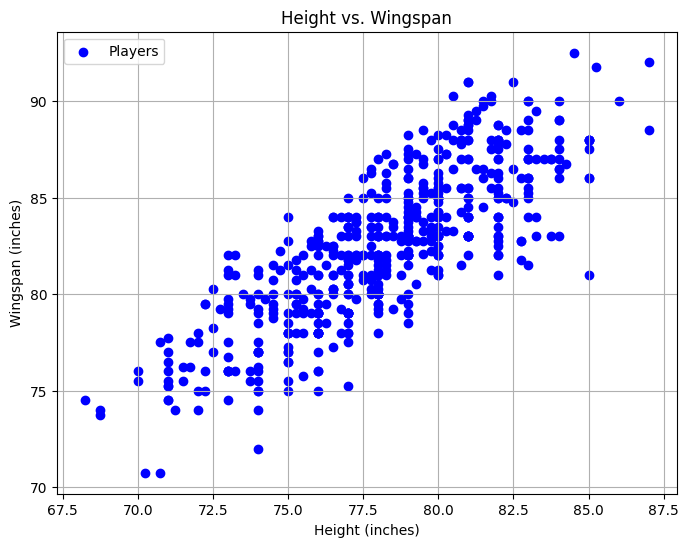

Correlation: 0.81


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(wingspan['Height-in'], wingspan['Wingspan-in'], color='blue', label='Players')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.title('Height vs. Wingspan')
plt.grid(True)
plt.legend()
plt.show()

# The two variables chosen for the scatterplot analysis were Height and Wingspan because it is important to check if a relation between both variables exists.
# If a meaningful correlation is established between wingspan and a players comprehensive value score, it must be assumed that height also has a role to play in that success.
# It is also important to see how  high the correlation is between Height and Wingspan before regressing player statistics onto wingspan.

correlation = wingspan['Height-in'].corr(wingspan['Wingspan-in'])
correlation = round(correlation, 2)
print(f"Correlation: {correlation}")
# The correlation between height in wingspan is 0.81. There is a strong positive linear relationship between the two variables.


In [ ]:
height_stats = wingspan['Height-in'].describe()
wingspan_stats = wingspan['Wingspan-in'].describe()

print("Height Summary Statistics:")
print(height_stats)
print("\nWingspan Summary Statistics:")
print(wingspan_stats)

# The summary statistics show that both data sets have 540 players, with wingspans being about 4 inches longer than a player's height, on average.
# The highest wingspan of 92.5 inches is 5.5 inches greater than the tallest height.

Height Summary Statistics:
count    540.000000
mean      78.200926
std        3.397983
min       68.250000
25%       76.000000
50%       78.250000
75%       80.750000
max       87.000000
Name: Height-in, dtype: float64

Wingspan Summary Statistics:
count    540.000000
mean      82.501111
std        3.949275
min       70.750000
25%       79.750000
50%       82.750000
75%       85.250000
max       92.500000
Name: Wingspan-in, dtype: float64


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Nyhus_Popper_Notebook.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Nyhus_Popper_Notebook.ipynb to html
[NbConvertApp] Writing 656427 bytes to /content/drive/MyDrive/Nyhus_Popper_Notebook.html


In [ ]:
!git clone --depth 1 --filter=blob:none --sparse https://github.com/fivethirtyeight/data.git
%cd data
!git sparse-checkout init --cone
!git sparse-checkout set nba-raptor
raptor = pd.read_csv('/content/data/nba-raptor/modern_RAPTOR_by_player.csv')
print(raptor.head())

Cloning into 'data'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 178 (delta 0), reused 137 (delta 0), pack-reused 0
Receiving objects: 100% (178/178), 36.19 KiB | 3.62 MiB/s, done.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), 12.05 KiB | 12.05 MiB/s, done.
/content/data/data/data/data/data/data
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Receiving objects: 100% (5/5), 3.76 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (2/2), done.
        player_name  player_id  season  poss    mp  raptor_box_offense  \
0      Alex Abrines  abrinal01    2017  2387  1135      

In [ ]:
pd.read_csv('../data/nba-raptor/modern_RAPTOR_by_player')

NameError: ignored